In [1]:

"""
    ans = mytrapezoids(fun, a, b, n)

Numerically evaluate the integral int_a^b fun(x) dx using the
trapezoidal rule: I = h/2*(f_1 + 2f_2 + ... + 2f_{n-1} + f_n),
where h = (b - a)/(n - 1), x_i = a + (i - 1)*h, f_i = fun(x_i).
"""
function mytrapezoids(fun, a, b, n)
    h = (b - a)/(n - 1)
    s1 = fun(a) + fun(b)
    s2 = 0
    for i = 2:(n-1)
        s2 += fun(a + h*(i - 1))
    end
    return (h/2)*(s1 + 2*s2)
end

mytrapezoids

In [2]:

fun1(x) = 1/x
a1 = 1.0
b1 = 2.0
exact1 = log(2)
n1 = 20

20

In [3]:

result1 = mytrapezoids(fun1, a1, b1, n1)

0.6933202508885106

In [4]:
exact1

0.6931471805599453

In [5]:
delta1 = round(abs(result1 - exact1), sigdigits = 1)

0.0002

In [6]:

fun2(x) = exp(x)
a2 = 0.0
b2 = 1.0
exact2 = exp(1)-1.0
n2 = 100

100

In [7]:
result2 = mytrapezoids(fun2,a2,b2,n2)

1.718296438183449

In [8]:
delta2 = round(abs(result2 - exact2), sigdigits = 1)

1.0e-5

In [9]:

fun3(x) = sin(x)
a3 = 0.0
b3 = pi
exact3 = 2.0

2.0

In [10]:

ndp = 10
hh = zeros(ndp) #create array of ndp elements
abserrs = zeros(ndp)

10-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [11]:

for i = 1:ndp
    np = 2^i + 1
    hh[i] = (b3 - a3)/(np - 1)
    abserrs[i] = abs(mytrapezoids(fun3,a3,b3,np) - exact3)
end

In [12]:
hh

10-element Vector{Float64}:
 1.5707963267948966
 0.7853981633974483
 0.39269908169872414
 0.19634954084936207
 0.09817477042468103
 0.04908738521234052
 0.02454369260617026
 0.01227184630308513
 0.006135923151542565
 0.0030679615757712823

In [13]:
abserrs

10-element Vector{Float64}:
 0.42920367320510344
 0.1038811020629602
 0.025768398054449193
 0.006429656227660452
 0.0016066390298559163
 0.00040161135996252817
 0.00010039981579623714
 2.5099764946912018e-5
 6.274929423177866e-6
 1.5687316166079768e-6

In [14]:

using PyPlot

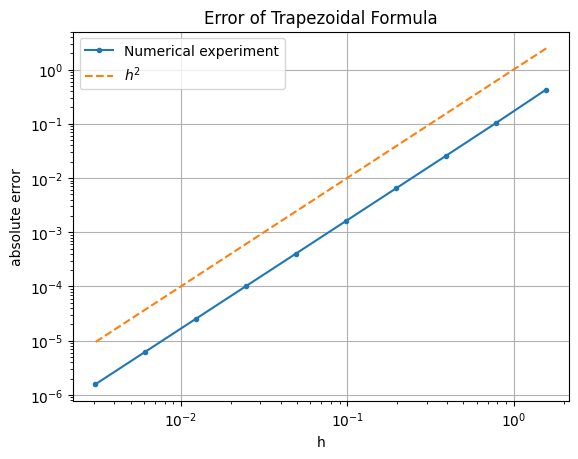

In [19]:

loglog(hh, abserrs, marker=".", label="Numerical experiment")
loglog(hh, hh.^2, linestyle="dashed", label=L"h^2")
grid(true)
xlabel("h")
ylabel("absolute error")
title("Error of Trapezoidal Formula")
legend();